In [147]:
import pandas as pd #Importing Pandas 
import numpy as np #Importing Numpy
import matplotlib.pyplot as plt #Importing Pyplot for plots
import seaborn as sns #Importing Seaborn for plots
import tensorflow as tf #Import tensorflow for building Neural Network
import h5py #Importing h5py for reading the sourcefile
from sklearn.preprocessing import LabelBinarizer #Binarizing the label for softmax function
from tensorflow import keras #Import Keras for building Neural Network
from keras.models import Sequential #Import Keras models for building Neural Network
from keras.layers import Activation, Dense, Flatten,BatchNormalization #Import Keras layers for building Neural Network
import datetime #Used for Logging
from sklearn.metrics import multilabel_confusion_matrix # Confusion Metrics

In [70]:
#Reading the Input Data from source file of format h5
Image_Data = h5py.File('SVHN_single_grey1.h5','r')
print('Split keys available in the source file: \n',Image_Data.keys())

Split keys available in the source file: 
 <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


In [71]:
#Splitting data for test and train 
X_train=Image_Data['X_train'][:]
X_test=Image_Data['X_test'][:]
y_train=Image_Data['y_train'][:]
y_test=Image_Data['y_test'][:]

In [72]:
print('The Shape of Train Data is:')
print('  X_train:',X_train.shape[0])
print('  y_train:',y_train.shape[0])
print('\nThe Shape of Test Data is:')
print('  X_test:',X_test.shape[0])
print('  y_test:',y_test.shape[0])

The Shape of Train Data is:
  X_train: 42000
  y_train: 42000

The Shape of Test Data is:
  X_test: 18000
  y_test: 18000


In [73]:
#Reshaping the Train and Test data to print the top 9 records
X_train = X_train.reshape(X_train.shape[0], 1, 32, 32)
X_test = X_test.reshape(X_test.shape[0], 1, 32, 32)
print('The Shape of Train Data after reshape is:')
print('  X_train:',X_train.shape[0])
print('\nThe Shape of Test Data after reshape is:')
print('  X_test:',X_test.shape[0])

The Shape of Train Data after reshape is:
  X_train: 42000

The Shape of Test Data after reshape is:
  X_test: 18000


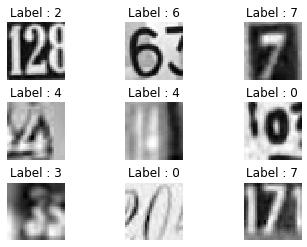

In [74]:
#Printing the top 9 records of Train data with Label
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i, 0], cmap='gray')
    plt.axis("off")
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    plt.title('Label : '+str(y_train[i]))

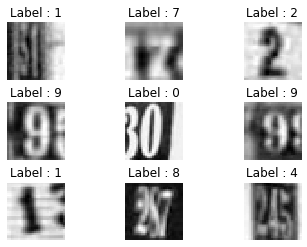

In [75]:
#Printing the top 9 records of Test data with Label
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i, 0], cmap='gray')
    plt.axis("off")
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    plt.title('Label : '+str(y_test[i]))

In [76]:
#Reshaping the data to train and test the model
RESHAPED = 1024
NB_CLASSES=10
X_train = X_train.reshape(42000, RESHAPED)
X_test = X_test.reshape(18000, RESHAPED)
print('The Shape of Train Data after reshape is:')
print('  X_train:',X_train.shape[0])
print('\nThe Shape of Test Data after reshape is:')
print('  X_test:',X_test.shape[0])

The Shape of Train Data after reshape is:
  X_train: 42000

The Shape of Test Data after reshape is:
  X_test: 18000


In [77]:
print('The Type of Train Data is:')
print('  X_train:',X_train.dtype)
print('\nThe Type of Test Data is:')
print('  X_test:',X_test.dtype)
#Converting the Y value to Categorical
# One-hot representation of the labels.
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)
print('\nTrain Lable Shape:',y_train.shape[0])
print('Test Lable Shape:',y_test.shape[0])

The Type of Train Data is:
  X_train: float32

The Type of Test Data is:
  X_test: float32

Train Lable Shape: 42000
Test Lable Shape: 18000


Normalizing the train data

In [78]:
X_train /= 255
X_test /= 255

# Running the model with 128 Neurons Hidden Layer 

In [245]:
Epochs = 350 # Varaible to indicate number of Epochs
Batch_Size = 128 # Batch size 
Verbose = 1
N_Hidden = 128 # number of hidden layers
Validation_Split = 0.2 # Split percentage for validation data
NB_Classes=10 # Total number of Output class
print('\nTrain the data with {} Epochs and {} N_Hidden Layers'.format(Epochs,N_Hidden))
# Initializing the ANN
model = tf.keras.models.Sequential() 
#Add 1st layer to Flatten the 3d array.Flattens the input
model.add(keras.layers.Flatten())
#Add 1st hidden layer wih activation function as RELU
model.add(keras.layers.Dense(N_Hidden,name='dense_layer',activation='relu'))
#Add 2nd hidden layer wih activation function as softmax
model.add(keras.layers.Dense(NB_Classes,name='dense_layer1',activation='softmax'))
#Compile the model using the Adam Optimizer with Crossentropy as Loss function and Accuracy as Metrics.
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#Fit the model
model.fit(X_train, y_train,batch_size=Batch_Size, epochs=Epochs,verbose=Verbose, validation_split=Validation_Split)


Train the data with 350 Epochs and 128 N_Hidden Layers
Train on 33600 samples, validate on 8400 samples
Epoch 1/350
33600/33600 [==============================] - 3s 99us/sample - loss: 2.2820 - accuracy: 0.1425 - val_loss: 2.1947 - val_accuracy: 0.2504
Epoch 2/350
33600/33600 [==============================] - 2s 54us/sample - loss: 2.0241 - accuracy: 0.3210 - val_loss: 1.8598 - val_accuracy: 0.3837
Epoch 3/350
33600/33600 [==============================] - 2s 55us/sample - loss: 1.7391 - accuracy: 0.4412 - val_loss: 1.6506 - val_accuracy: 0.4749
Epoch 4/350
33600/33600 [==============================] - 2s 54us/sample - loss: 1.5730 - accuracy: 0.5043 - val_loss: 1.5110 - val_accuracy: 0.5188
Epoch 5/350
33600/33600 [==============================] - 2s 54us/sample - loss: 1.4715 - accuracy: 0.5390 - val_loss: 1.4215 - val_accuracy: 0.5658
Epoch 6/350
33600/33600 [==============================] - 2s 55us/sample - loss: 1.4002 - accuracy: 0.5664 - val_loss: 1.3956 - val_accuracy: 0.

In [246]:
train_loss, train_acc = model.evaluate(X_train, y_train) 
print('\nTrain accuracy after 400 Epochs is {} with {} Loss'.format(train_acc*100,train_loss))
print('\nSummary:\n')
print(model.summary())
test_loss, test_acc = model.evaluate(X_test, y_test) 
print('\nTest accuracy after 400 Epochs is {} with {} Loss'.format(test_acc*100,test_loss))

42000/42000 [==============================] - 3s 60us/sample - loss: 0.9225 - accuracy: 0.7208

Train accuracy after 400 Epochs is 72.08095192909241 with 0.9224536650067284 Loss

Summary:

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_81 (Flatten)         multiple                  0         
_________________________________________________________________
dense_layer (Dense)          multiple                  131200    
_________________________________________________________________
dense_layer1 (Dense)         multiple                  1290      
Total params: 132,490
Trainable params: 132,490
Non-trainable params: 0
_________________________________________________________________
None
18000/18000 [==============================] - 1s 60us/sample - loss: 1.0258 - accuracy: 0.6955

Test accuracy after 400 Epochs is 69.55000162124634 with 1.0257996833059524 Loss


Futher increase in the Epochs is reducing the accuracy hence going to the next option to increase the number of neurons in hidden layer.

# Running the model with 256 Neurons Hidden Layer

In [181]:
Epochs = 350 # Varaible to indicate number of Epochs
Batch_Size = 128 # Batch size 
Verbose = 1
N_Hidden = 256 # number of hidden layers
Validation_Split = 0.2 # Split percentage for validation data
NB_Classes=10 # Total number of Output class
print('\nTrain the data with {} Epochs and {} N_Hidden Layers'.format(Epochs,N_Hidden))
# Initializing the ANN
model1 = tf.keras.models.Sequential() 
#Add 1st layer to Flatten the 3d array.Flattens the input
model1.add(keras.layers.Flatten())
#Add 1st hidden layer wih activation function as RELU
model1.add(keras.layers.Dense(N_Hidden,name='dense_layer',activation='relu'))
#Add 2nd hidden layer wih activation function as softmax
model1.add(keras.layers.Dense(NB_Classes,name='dense_layer2',activation='softmax'))
#Compile the model using the Adam Optimizer with Crossentropy as Loss function and Accuracy as Metrics.
model1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#Fit the model
model1.fit(X_train, y_train,batch_size=Batch_Size, epochs=Epochs,verbose=Verbose, validation_split=Validation_Split)


Train the data with 350 Epochs and 256 N_Hidden Layers
Train on 33600 samples, validate on 8400 samples
Epoch 1/350
33600/33600 [==============================] - 4s 105us/sample - loss: 2.3005 - accuracy: 0.1301 - val_loss: 2.2447 - val_accuracy: 0.1411
Epoch 2/350
33600/33600 [==============================] - 3s 76us/sample - loss: 2.0698 - accuracy: 0.2884 - val_loss: 1.8844 - val_accuracy: 0.3974
Epoch 3/350
33600/33600 [==============================] - 3s 77us/sample - loss: 1.7320 - accuracy: 0.4547 - val_loss: 1.6042 - val_accuracy: 0.5093
Epoch 4/350
33600/33600 [==============================] - 3s 78us/sample - loss: 1.5088 - accuracy: 0.5474 - val_loss: 1.4300 - val_accuracy: 0.5739
Epoch 5/350
33600/33600 [==============================] - 3s 81us/sample - loss: 1.3763 - accuracy: 0.5933 - val_loss: 1.3258 - val_accuracy: 0.6082
Epoch 6/350
33600/33600 [==============================] - 3s 81us/sample - loss: 1.2880 - accuracy: 0.6182 - val_loss: 1.2700 - val_accuracy: 0

In [182]:
train_loss, train_acc = model1.evaluate(X_train, y_train) 
print('\nTrain accuracy after 350 Epochs is {} with {} Loss'.format(train_acc*100,train_loss))
print('\nSummary:\n')
print(model1.summary())
test_loss, test_acc = model1.evaluate(X_test, y_test) 
print('\nTest accuracy after 350 Epochs is {} with {} Loss'.format(test_acc*100,test_loss))

42000/42000 [==============================] - 3s 78us/sample - loss: 0.6183 - accuracy: 0.8184

Train accuracy after 350 Epochs is 81.84285759925842 with 0.6182756448132651 Loss

Summary:

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_49 (Flatten)         multiple                  0         
_________________________________________________________________
dense_layer (Dense)          multiple                  262400    
_________________________________________________________________
dense_layer2 (Dense)         multiple                  2570      
Total params: 264,970
Trainable params: 264,970
Non-trainable params: 0
_________________________________________________________________
None
18000/18000 [==============================] - 1s 83us/sample - loss: 0.8028 - accuracy: 0.7777

Test accuracy after 350 Epochs is 77.77222394943237 with 0.8027776382499271 Loss


Adding one more layer to improve the accuracy

In [189]:
Epochs = 400 # Varaible to indicate number of Epochs
Batch_Size = 128 # Batch size 
Verbose = 1
N_Hidden = 256 # number of hidden layers
Validation_Split = 0.2 # Split percentage for validation data
NB_Classes=10 # Total number of Output class
print('\nTrain the data with {} Epochs and {} N_Hidden Layers'.format(Epochs,N_Hidden))
# Initializing the ANN
model1 = tf.keras.models.Sequential() 
#Add 1st layer to Flatten the 3d array.Flattens the input
model1.add(keras.layers.Flatten())
#Add 1st hidden layer wih activation function as RELU
model1.add(keras.layers.Dense(N_Hidden,name='dense_layer',activation='relu'))
#Add 2nd hidden layer wih activation function as RELU
model1.add(keras.layers.Dense(N_Hidden-128,name='dense_layer1',activation='relu'))
#Add 3rd hidden layer wih activation function as softmax
model1.add(keras.layers.Dense(NB_Classes,name='dense_layer2',activation='softmax'))
#Compile the model using the Adam Optimizer with Crossentropy as Loss function and Accuracy as Metrics.
model1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#Fit the model
model1.fit(X_train, y_train,batch_size=Batch_Size, epochs=Epochs,verbose=Verbose, validation_split=Validation_Split)


Train the data with 400 Epochs and 256 N_Hidden Layers
Train on 33600 samples, validate on 8400 samples
Epoch 1/400
33600/33600 [==============================] - 4s 123us/sample - loss: 2.2817 - accuracy: 0.1371 - val_loss: 2.1367 - val_accuracy: 0.2263
Epoch 2/400
33600/33600 [==============================] - 3s 89us/sample - loss: 1.7113 - accuracy: 0.4243 - val_loss: 1.4820 - val_accuracy: 0.5102
Epoch 3/400
33600/33600 [==============================] - 3s 88us/sample - loss: 1.3306 - accuracy: 0.5749 - val_loss: 1.2302 - val_accuracy: 0.6143
Epoch 4/400
33600/33600 [==============================] - 3s 88us/sample - loss: 1.1870 - accuracy: 0.6301 - val_loss: 1.1282 - val_accuracy: 0.6560
Epoch 5/400
33600/33600 [==============================] - 3s 89us/sample - loss: 1.0894 - accuracy: 0.6643 - val_loss: 1.0573 - val_accuracy: 0.6764
Epoch 6/400
33600/33600 [==============================] - 3s 88us/sample - loss: 1.0336 - accuracy: 0.6813 - val_loss: 1.0424 - val_accuracy: 0

In [190]:
train_loss, train_acc = model1.evaluate(X_train, y_train) 
print('\nTrain accuracy after 400 Epochs is {} with {} Loss'.format(train_acc*100,train_loss))
print('\nSummary:\n')
print(model1.summary())
test_loss, test_acc = model1.evaluate(X_test, y_test) 
print('\nTest accuracy after 400 Epochs is {} with {} Loss'.format(test_acc*100,test_loss))

42000/42000 [==============================] - 3s 83us/sample - loss: 0.3238 - accuracy: 0.9269

Train accuracy after 400 Epochs is 92.69285798072815 with 0.3237744413045723 Loss

Summary:

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_53 (Flatten)         multiple                  0         
_________________________________________________________________
dense_layer (Dense)          multiple                  262400    
_________________________________________________________________
dense_layer1 (Dense)         multiple                  32896     
_________________________________________________________________
dense_layer2 (Dense)         multiple                  1290      
Total params: 296,586
Trainable params: 296,586
Non-trainable params: 0
_________________________________________________________________
None
18000/18000 [==============================] - 2s 

# Running the model with 384 Neurons Hidden Layer

In [253]:
Epochs = 100 # Varaible to indicate number of Epochs
Batch_Size = 128 # Batch size 
Verbose = 1
N_Hidden = 384 # number of hidden layers
Validation_Split = 0.2 # Split percentage for validation data
NB_Classes=10 # Total number of Output class
print('\nTrain the data with {} Epochs and {} N_Hidden Layers'.format(Epochs,N_Hidden))
# Initializing the ANN
model2 = tf.keras.models.Sequential() 
#Add 1st layer to Flatten the 3d array.Flattens the input
model2.add(keras.layers.Flatten())
#Add 1st hidden layer wih activation function as RELU
model2.add(keras.layers.Dense(N_Hidden,name='dense_layer',activation='relu'))
#Add 2nd hidden layer wih activation function as RELU
model2.add(keras.layers.Dense(N_Hidden-128,name='dense_layer1',activation='relu'))
#Add 3rd hidden layer wih activation function as softmax
model2.add(keras.layers.Dense(NB_Classes,name='dense_layer3',activation='softmax'))
#Compile the model using the Adam Optimizer with Crossentropy as Loss function and Accuracy as Metrics.
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#Fit the model
model2.fit(X_train, y_train,batch_size=Batch_Size, epochs=Epochs,verbose=Verbose, validation_split=Validation_Split)


Train the data with 100 Epochs and 384 N_Hidden Layers
Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 6s 164us/sample - loss: 2.1898 - accuracy: 0.1889 - val_loss: 1.8191 - val_accuracy: 0.3704
Epoch 2/100
33600/33600 [==============================] - 5s 140us/sample - loss: 1.5798 - accuracy: 0.4682 - val_loss: 1.4006 - val_accuracy: 0.5487
Epoch 3/100
33600/33600 [==============================] - 5s 137us/sample - loss: 1.2817 - accuracy: 0.5909 - val_loss: 1.3013 - val_accuracy: 0.5869
Epoch 4/100
33600/33600 [==============================] - 4s 134us/sample - loss: 1.1423 - accuracy: 0.6432 - val_loss: 1.1490 - val_accuracy: 0.6319
Epoch 5/100
33600/33600 [==============================] - 5s 135us/sample - loss: 1.0574 - accuracy: 0.6710 - val_loss: 1.0311 - val_accuracy: 0.6840
Epoch 6/100
33600/33600 [==============================] - 5s 135us/sample - loss: 1.0036 - accuracy: 0.6884 - val_loss: 1.0110 - val_accura

In [254]:
train_loss, train_acc = model2.evaluate(X_train, y_train) 
print('\nTrain accuracy after 100 Epochs is {} with {} Loss'.format(train_acc*100,train_loss))
print('\nSummary:\n')
print(model2.summary())
test_loss, test_acc = model2.evaluate(X_test, y_test) 
print('\nTest accuracy after 100 Epochs is {} with {} Loss'.format(test_acc*100,test_loss))

42000/42000 [==============================] - 5s 122us/sample - loss: 0.3955 - accuracy: 0.8833

Train accuracy after 100 Epochs is 88.33333253860474 with 0.39554406454662483 Loss

Summary:

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_86 (Flatten)         multiple                  0         
_________________________________________________________________
dense_layer (Dense)          multiple                  393600    
_________________________________________________________________
dense_layer1 (Dense)         multiple                  98560     
_________________________________________________________________
dense_layer3 (Dense)         multiple                  2570      
Total params: 494,730
Trainable params: 494,730
Non-trainable params: 0
_________________________________________________________________
None
18000/18000 [==============================] - 2

Adding one more layer to increase the accuracy

In [256]:
Epochs = 100 # Varaible to indicate number of Epochs
Batch_Size = 128 # Batch size 
Verbose = 1
N_Hidden = 384 # number of hidden layers
Validation_Split = 0.2 # Split percentage for validation data
NB_Classes=10 # Total number of Output class
print('\nTrain the data with {} Epochs and {} N_Hidden Layers'.format(Epochs,N_Hidden))
# Initializing the ANN
model2 = tf.keras.models.Sequential() 
#Add 1st layer to Flatten the 3d array.Flattens the input
model2.add(keras.layers.Flatten())
#Add 1st hidden layer wih activation function as RELU
model2.add(keras.layers.Dense(N_Hidden,name='dense_layer',activation='relu'))
#Add 2nd hidden layer wih activation function as RELU
model2.add(keras.layers.Dense(N_Hidden-128,name='dense_layer1',activation='relu'))
#Add 3rd hidden layer wih activation function as RELU
model2.add(keras.layers.Dense(N_Hidden-256,name='dense_layer1',activation='relu'))
#Add 4th hidden layer wih activation function as softmax
model2.add(keras.layers.Dense(NB_Classes,name='dense_layer2',activation='softmax'))
#Compile the model using the Adam Optimizer with Crossentropy as Loss function and Accuracy as Metrics.
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#Fit the model
model2.fit(X_train, y_train,batch_size=Batch_Size, epochs=Epochs,verbose=Verbose, validation_split=Validation_Split)


Train the data with 100 Epochs and 384 N_Hidden Layers
Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 6s 171us/sample - loss: 2.2102 - accuracy: 0.1660 - val_loss: 1.8097 - val_accuracy: 0.3518
Epoch 2/100
33600/33600 [==============================] - 5s 140us/sample - loss: 1.5675 - accuracy: 0.4640 - val_loss: 1.3753 - val_accuracy: 0.5436
Epoch 3/100
33600/33600 [==============================] - 5s 144us/sample - loss: 1.2729 - accuracy: 0.5889 - val_loss: 1.2057 - val_accuracy: 0.6225
Epoch 4/100
33600/33600 [==============================] - 5s 142us/sample - loss: 1.1354 - accuracy: 0.6397 - val_loss: 1.1179 - val_accuracy: 0.6424
Epoch 5/100
33600/33600 [==============================] - 5s 139us/sample - loss: 1.0513 - accuracy: 0.6721 - val_loss: 1.0326 - val_accuracy: 0.6773
Epoch 6/100
33600/33600 [==============================] - 5s 138us/sample - loss: 0.9775 - accuracy: 0.6951 - val_loss: 0.9542 - val_accura

In [257]:
train_loss, train_acc = model2.evaluate(X_train, y_train) #92,79
print('\nTrain accuracy after 100 Epochs is {} with {} Loss'.format(train_acc*100,train_loss))
print('\nSummary:\n')
print(model2.summary())
test_loss, test_acc = model2.evaluate(X_test, y_test) 
print('\nTest accuracy after 100 Epochs is {} with {} Loss'.format(test_acc*100,test_loss))

42000/42000 [==============================] - 5s 122us/sample - loss: 0.3707 - accuracy: 0.9058

Train accuracy after 100 Epochs is 90.57857394218445 with 0.37070093891592254 Loss

Summary:

Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_88 (Flatten)         multiple                  0         
_________________________________________________________________
dense_layer (Dense)          multiple                  393600    
_________________________________________________________________
dense_layer1 (Dense)         multiple                  98560     
_________________________________________________________________
dense_layer1 (Dense)         multiple                  32896     
_________________________________________________________________
dense_layer2 (Dense)         multiple                  1290      
Total params: 526,346
Trainable params: 526,346
Non-trainab

# Running the model with 512 Neurons Hidden Layer

In [258]:
Epochs = 100 # Varaible to indicate number of Epochs
Batch_Size = 128 # Batch size 
Verbose = 1
N_Hidden = 512 # number of hidden layers
Validation_Split = 0.2 # Split percentage for validation data
NB_Classes=10 # Total number of Output class
print('\nTrain the data with {} Epochs and {} N_Hidden Layers'.format(Epochs,N_Hidden))
# Initializing the ANN
model2 = tf.keras.models.Sequential() 
#Add 1st layer to Flatten the 3d array.Flattens the input
model2.add(keras.layers.Flatten())
#Add 1st hidden layer wih activation function as RELU
model2.add(keras.layers.Dense(N_Hidden,name='dense_layer',activation='relu'))
#Add 2nd hidden layer wih activation function as RELU
model2.add(keras.layers.Dense(N_Hidden-128,name='dense_layer1',activation='relu'))
#Add 3rd hidden layer wih activation function as softmax
model2.add(keras.layers.Dense(NB_Classes,name='dense_layer2',activation='softmax'))
#Compile the model using the Adam Optimizer with Crossentropy as Loss function and Accuracy as Metrics.
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#Fit the model
model2.fit(X_train, y_train,batch_size=Batch_Size, epochs=Epochs,verbose=Verbose, validation_split=Validation_Split)


Train the data with 100 Epochs and 512 N_Hidden Layers
Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 7s 221us/sample - loss: 2.1723 - accuracy: 0.1959 - val_loss: 1.7097 - val_accuracy: 0.4380
Epoch 2/100
33600/33600 [==============================] - 6s 192us/sample - loss: 1.4631 - accuracy: 0.5195 - val_loss: 1.2661 - val_accuracy: 0.6119
Epoch 3/100
33600/33600 [==============================] - 6s 186us/sample - loss: 1.2065 - accuracy: 0.6196 - val_loss: 1.1222 - val_accuracy: 0.6537
Epoch 4/100
33600/33600 [==============================] - 6s 186us/sample - loss: 1.1061 - accuracy: 0.6570 - val_loss: 1.0819 - val_accuracy: 0.6636
Epoch 5/100
33600/33600 [==============================] - 6s 186us/sample - loss: 1.0191 - accuracy: 0.6882 - val_loss: 0.9796 - val_accuracy: 0.6975
Epoch 6/100
33600/33600 [==============================] - 6s 184us/sample - loss: 0.9758 - accuracy: 0.7002 - val_loss: 0.9757 - val_accura

In [259]:
train_loss, train_acc = model2.evaluate(X_train, y_train) 
print('\nTrain accuracy after 100 Epochs is {} with {} Loss'.format(train_acc*100,train_loss))
print('\nSummary:\n')
print(model2.summary())
test_loss, test_acc = model2.evaluate(X_test, y_test) 
print('\nTest accuracy after 100 Epochs is {} with {} Loss'.format(test_acc*100,test_loss))

42000/42000 [==============================] - 8s 186us/sample - loss: 0.3707 - accuracy: 0.8945

Train accuracy after 100 Epochs is 89.45237994194031 with 0.3706653899805886 Loss

Summary:

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_89 (Flatten)         multiple                  0         
_________________________________________________________________
dense_layer (Dense)          multiple                  524800    
_________________________________________________________________
dense_layer1 (Dense)         multiple                  196992    
_________________________________________________________________
dense_layer2 (Dense)         multiple                  3850      
Total params: 725,642
Trainable params: 725,642
Non-trainable params: 0
_________________________________________________________________
None
18000/18000 [==============================] - 4s

Increasing the Epochs is decreasing the performance.Adding one more layer to check for accuracy

In [262]:
Epochs = 100 # Varaible to indicate number of Epochs
Batch_Size = 128 # Batch size 
Verbose = 1
N_Hidden = 512 # number of hidden layers
Validation_Split = 0.2 # Split percentage for validation data
NB_Classes=10 # Total number of Output class
print('\nTrain the data with {} Epochs and {} N_Hidden Layers'.format(Epochs,N_Hidden))
# Initializing the ANN
model2 = tf.keras.models.Sequential() 
#Add 1st layer to Flatten the 3d array.Flattens the input
model2.add(keras.layers.Flatten())
#Add 1st hidden layer wih activation function as RELU
model2.add(keras.layers.Dense(N_Hidden,name='dense_layer',activation='relu'))
#Add 2nd hidden layer wih activation function as RELU
model2.add(keras.layers.Dense(N_Hidden-128,name='dense_layer1',activation='relu'))
#Add 3rd hidden layer wih activation function as RELU
model2.add(keras.layers.Dense(N_Hidden-256,name='dense_layer1',activation='relu'))
#Add 4th hidden layer wih activation function as softmax
model2.add(keras.layers.Dense(NB_Classes,name='dense_layer2',activation='softmax'))
#Compile the model using the Adam Optimizer with Crossentropy as Loss function and Accuracy as Metrics.
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#Fit the model
model2.fit(X_train, y_train,batch_size=Batch_Size, epochs=Epochs,verbose=Verbose, validation_split=Validation_Split)


Train the data with 100 Epochs and 512 N_Hidden Layers
Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 8s 229us/sample - loss: 2.1624 - accuracy: 0.1867 - val_loss: 1.6705 - val_accuracy: 0.4221
Epoch 2/100
33600/33600 [==============================] - 7s 199us/sample - loss: 1.4512 - accuracy: 0.5135 - val_loss: 1.2662 - val_accuracy: 0.5935
Epoch 3/100
33600/33600 [==============================] - 7s 199us/sample - loss: 1.2036 - accuracy: 0.6115 - val_loss: 1.1906 - val_accuracy: 0.6257
Epoch 4/100
33600/33600 [==============================] - 7s 198us/sample - loss: 1.0842 - accuracy: 0.6588 - val_loss: 1.0207 - val_accuracy: 0.6824
Epoch 5/100
33600/33600 [==============================] - 7s 198us/sample - loss: 0.9904 - accuracy: 0.6899 - val_loss: 1.0453 - val_accuracy: 0.6668
Epoch 6/100
33600/33600 [==============================] - 7s 198us/sample - loss: 0.9267 - accuracy: 0.7117 - val_loss: 0.8894 - val_accura

In [263]:
train_loss, train_acc = model2.evaluate(X_train, y_train) 
print('\nTrain accuracy after 100 Epochs is {} with {} Loss'.format(train_acc*100,train_loss))
print('\nSummary:\n')
print(model2.summary())
test_loss, test_acc = model2.evaluate(X_test, y_test) 
print('\nTest accuracy after 100 Epochs is {} with {} Loss'.format(test_acc*100,test_loss))

42000/42000 [==============================] - 8s 183us/sample - loss: 0.3310 - accuracy: 0.9410

Train accuracy after 100 Epochs is 94.0999984741211 with 0.3310150070223248 Loss

Summary:

Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_91 (Flatten)         multiple                  0         
_________________________________________________________________
dense_layer (Dense)          multiple                  524800    
_________________________________________________________________
dense_layer1 (Dense)         multiple                  196992    
_________________________________________________________________
dense_layer1 (Dense)         multiple                  98560     
_________________________________________________________________
dense_layer2 (Dense)         multiple                  2570      
Total params: 822,922
Trainable params: 822,922
Non-trainable

In [ ]:
Since increasing the layers is decreasing the performance training the model with 768 Neurons

# Running the model with 768 Neurons Hidden Layer

In [268]:
Epochs = 100 # Varaible to indicate number of Epochs
Batch_Size = 128 # Batch size 
Verbose = 1
N_Hidden = 768 # number of hidden layers
Validation_Split = 0.2 # Split percentage for validation data
NB_Classes=10 # Total number of Output class
print('\nTrain the data with {} Epochs and {} N_Hidden Layers'.format(Epochs,N_Hidden))
# Initializing the ANN
model2 = tf.keras.models.Sequential() 
#Add 1st layer to Flatten the 3d array.Flattens the input
model2.add(keras.layers.Flatten())
#Add 1st hidden layer wih activation function as RELU
model2.add(keras.layers.Dense(N_Hidden,name='dense_layer',activation='relu'))
#Add 2nd hidden layer wih activation function as RELU
model2.add(keras.layers.Dense(N_Hidden-128,name='dense_layer1',activation='relu'))
#Add 3rd hidden layer wih activation function as RELU
model2.add(keras.layers.Dense(N_Hidden-256,name='dense_layer1',activation='relu'))
#Add 4th hidden layer wih activation function as softmax
model2.add(keras.layers.Dense(NB_Classes,name='dense_layer2',activation='softmax'))
#Compile the model using the Adam Optimizer with Crossentropy as Loss function and Accuracy as Metrics.
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#Fit the model
model2.fit(X_train, y_train,batch_size=Batch_Size, epochs=Epochs,verbose=Verbose, validation_split=Validation_Split)


Train the data with 100 Epochs and 768 N_Hidden Layers
Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 13s 390us/sample - loss: 1.9813 - accuracy: 0.2721 - val_loss: 1.5346 - val_accuracy: 0.4740
Epoch 2/100
33600/33600 [==============================] - 12s 351us/sample - loss: 1.3119 - accuracy: 0.5634 - val_loss: 1.2598 - val_accuracy: 0.5764
Epoch 3/100
33600/33600 [==============================] - 12s 354us/sample - loss: 1.1040 - accuracy: 0.6503 - val_loss: 1.0535 - val_accuracy: 0.6650
Epoch 4/100
33600/33600 [==============================] - 12s 354us/sample - loss: 0.9914 - accuracy: 0.6885 - val_loss: 0.9556 - val_accuracy: 0.6981
Epoch 5/100
33600/33600 [==============================] - 12s 353us/sample - loss: 0.9215 - accuracy: 0.7093 - val_loss: 0.9464 - val_accuracy: 0.7020
Epoch 6/100
33600/33600 [==============================] - 12s 353us/sample - loss: 0.8682 - accuracy: 0.7247 - val_loss: 0.8567 - val_

In [269]:
train_loss, train_acc = model2.evaluate(X_train, y_train) 
print('\nTrain accuracy after 100 Epochs is {} with {} Loss'.format(train_acc*100,train_loss))
print('\nSummary:\n')
print(model2.summary())
test_loss, test_acc = model2.evaluate(X_test, y_test) 
print('\nTest accuracy after 100 Epochs is {} with {} Loss'.format(test_acc*100,test_loss))

42000/42000 [==============================] - 15s 357us/sample - loss: 0.3053 - accuracy: 0.9628

Train accuracy after 100 Epochs is 96.28095030784607 with 0.3053421082283104 Loss

Summary:

Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_94 (Flatten)         multiple                  0         
_________________________________________________________________
dense_layer (Dense)          multiple                  787200    
_________________________________________________________________
dense_layer1 (Dense)         multiple                  492160    
_________________________________________________________________
dense_layer1 (Dense)         multiple                  328192    
_________________________________________________________________
dense_layer2 (Dense)         multiple                  5130      
Total params: 1,612,682
Trainable params: 1,612,682
Non-tra

The model after adding one more layer is tending to overfit hence changing the neurons to 896

# Running the model with 896 Neurons Hidden Layer

In [275]:
Epochs =  # Varaible to indicate number of Epochs
Batch_Size = 128 # Batch size 
Verbose = 1
N_Hidden = 896 # number of hidden layers
Validation_Split = 0.2 # Split percentage for validation data
NB_Classes=10 # Total number of Output class
print('\nTrain the data with {} Epochs and {} N_Hidden Layers'.format(Epochs,N_Hidden))
# Initializing the ANN
model2 = tf.keras.models.Sequential() 
#Add 1st layer to Flatten the 3d array.Flattens the input
model2.add(keras.layers.Flatten())
#Add 1st hidden layer wih activation function as RELU
model2.add(keras.layers.Dense(N_Hidden,name='dense_layer',activation='relu'))
#Add 2nd hidden layer wih activation function as RELU
model2.add(keras.layers.Dense(N_Hidden-128,name='dense_layer1',activation='relu'))
#Add 3rd hidden layer wih activation function as softmax
model2.add(keras.layers.Dense(NB_Classes,name='dense_layer2',activation='softmax'))
#Compile the model using the Adam Optimizer with Crossentropy as Loss function and Accuracy as Metrics.
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#Fit the model
model2.fit(X_train, y_train,batch_size=Batch_Size, epochs=Epochs,verbose=Verbose, validation_split=Validation_Split)


Train the data with 100 Epochs and 896 N_Hidden Layers
Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 12s 368us/sample - loss: 2.1702 - accuracy: 0.1992 - val_loss: 1.7127 - val_accuracy: 0.4082
Epoch 2/100
33600/33600 [==============================] - 13s 387us/sample - loss: 1.4404 - accuracy: 0.5280 - val_loss: 1.3020 - val_accuracy: 0.5727
Epoch 3/100
33600/33600 [==============================] - 13s 394us/sample - loss: 1.1796 - accuracy: 0.6256 - val_loss: 1.1173 - val_accuracy: 0.6502
Epoch 4/100
33600/33600 [==============================] - 12s 348us/sample - loss: 1.0559 - accuracy: 0.6736 - val_loss: 1.0256 - val_accuracy: 0.6870
Epoch 5/100
33600/33600 [==============================] - 11s 338us/sample - loss: 0.9947 - accuracy: 0.6886 - val_loss: 0.9616 - val_accuracy: 0.7044
Epoch 6/100
33600/33600 [==============================] - 11s 338us/sample - loss: 0.9419 - accuracy: 0.7071 - val_loss: 0.9388 - val_

In [276]:
train_loss, train_acc = model2.evaluate(X_train, y_train) 
print('\nTrain accuracy after 100 Epochs is {} with {} Loss'.format(train_acc*100,train_loss))
print('\nSummary:\n')
print(model2.summary())
test_loss, test_acc = model2.evaluate(X_test, y_test) 
print('\nTest accuracy after 100 Epochs is {} with {} Loss'.format(test_acc*100,test_loss))

42000/42000 [==============================] - 15s 351us/sample - loss: 0.2971 - accuracy: 0.9256

Train accuracy after 100 Epochs is 92.56190657615662 with 0.2970798766300792 Loss

Summary:

Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_99 (Flatten)         multiple                  0         
_________________________________________________________________
dense_layer (Dense)          multiple                  918400    
_________________________________________________________________
dense_layer1 (Dense)         multiple                  688896    
_________________________________________________________________
dense_layer2 (Dense)         multiple                  7690      
Total params: 1,614,986
Trainable params: 1,614,986
Non-trainable params: 0
_________________________________________________________________
None
18000/18000 [==============================

Further increase in the model or neurons is tending to overfit the model.

Model with 512 Neurons 2 Layers is providing the Train accuracy of 89.45% and test accuracy of 82.47%.
The loss in train is 0.3706 and 0.7367 test is .
If we add more neurons or more layers the model is tending to overfit.